# Sample

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

mat = nx.Material.Template(nx.lib.material.Fe2O3)

site = nx.Hyperfine(magnetic_field = 33,
                    isotropic = True
                    )

mat.hyperfine_sites = [site]

lay = nx.Layer(id = "iron oxide layer",
               thickness = 1000,  # in nanometer
               material = mat,
               roughness = 30,
               thickness_fwhm = 50
               )

sample = nx.Sample(id = "my sample",
                   layers = [lay],    # list with all layers in beam propagation direction
                   geometry = "f",    # scattering geometry, forward here
                   angle = 0.4,       # incidence angle (degree)
                   length = 10,       # in mm
                   roughness = "a",   # analytical roughness model
                   divergence = 0.0,  # incoming beam divergence (deg)
                   # effective_thickness = 0.3, # only used for effective density model
                   # drive_detuning = []        # only used for EnergyTimeSpectra
                   )

print(sample.id)

print(sample)

my sample
Sample
  .id: my sample
  .geometry: f
  .angle (deg) = 0.4
  .divergence (deg) = 0.0
  .length (mm) = 10.0
  .roughness (model): a
-------|------------------------|---------------|-------------|-------------|--------|-----------|----------|-------------|
 index |               Layer id | dens. (g/cm3) | thick. (nm) | rough. (nm) | abund. | LM factor | HI sites | dist points |
-------|------------------------|---------------|-------------|-------------|--------|-----------|----------|-------------|
     0 |       iron oxide layer |          5.25 |      1000.0 |        30.0 |   0.02 |     0.793 |        1 |           1 |
-------|------------------------|---------------|-------------|-------------|--------|-----------|----------|-------------|



In [2]:
import nexus as nx
import numpy as np

lay_Pt_top = nx.Layer(id = "Pt top",
                      material = nx.Material.Template(nx.lib.material.Pt),
                      thickness = 2,
                      roughness = 0.2)

lay_C = nx.Layer(id = "C",
                 material = nx.Material.Template(nx.lib.material.C),
                 thickness = 20,
                 roughness = 0.3)

lay_Pt = nx.Layer(id = "Pt",
                  material = nx.Material.Template(nx.lib.material.Pt),
                  thickness = 15,
                  roughness = 0.2)

lay_substrate = nx.Layer(id = "Si sub",
                         material = nx.Material.Template(nx.lib.material.Si),
                         thickness = nx.inf,
                         roughness = 0.2)


sample = nx.Sample(layers = [lay_Pt_top, lay_C, lay_Pt, lay_substrate],
                   geometry = "r",
                   length = nx.inf,
                   roughness = "a")

In [3]:
beam  = nx.Beam()

exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.moessbauer.Fe57,
                    id = "my exp")

angles = np.arange(0.001, 2, 0.0001, dtype = np.double)

reflectivity = nx.Reflectivity(experiment = exp,
                               sample = sample,
                               energy = nx.lib.energy.CuKalpha,
                               angles = angles)


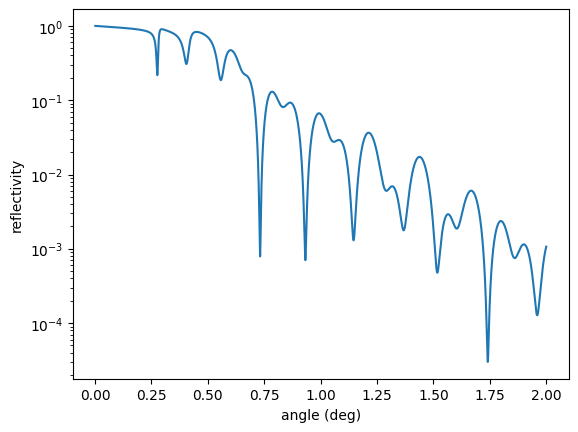

In [4]:
refl_a = reflectivity()

plt.semilogy(angles, refl_a)
plt.xlabel('angle (deg)')
plt.ylabel('reflectivity')
plt.show()

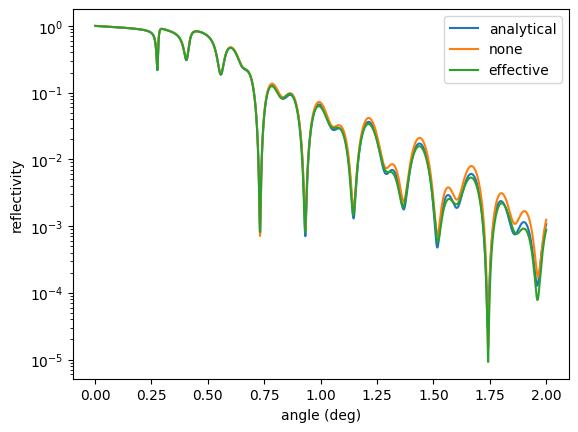

In [5]:
sample.roughness = "n"

refl_n = reflectivity()

sample.roughness = "e"

refl_e = reflectivity()

plt.semilogy(angles, refl_a, label = "analytical")
plt.semilogy(angles, refl_n, label = "none")
plt.semilogy(angles, refl_e, label = "effective")

plt.legend()
plt.xlabel('angle (deg)')
plt.ylabel('reflectivity')
plt.show()

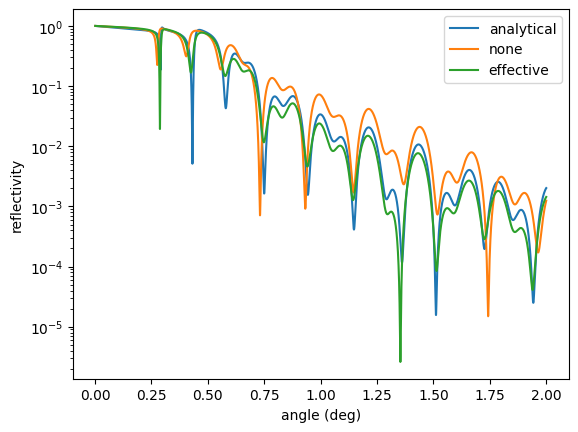

In [6]:
lay_C.roughness = 3.0

sample.roughness = "a"

refl_a = reflectivity()

sample.roughness = "n"

refl_n = reflectivity()

sample.roughness = "e"

refl_e = reflectivity()

plt.semilogy(angles, refl_a, label = "analytical")
plt.semilogy(angles, refl_n, label = "none")
plt.semilogy(angles, refl_e, label = "effective")

plt.legend()
plt.xlabel('angle (deg)')
plt.ylabel('reflectivity')
plt.show()